<a href="https://colab.research.google.com/github/AnkithR10/Salary-and-trend-in-Data-science-Jobs/blob/main/Salary_and_trend_in_Data_science_Jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
#for mathematical computation
import numpy as np
import pandas as pd
import scipy.stats as stats
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

import plotly.express as px
from matplotlib.pyplot import figure
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# load the data
df = pd.read_csv('/content/jobs_in_data.csv')

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [ ]:
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [ ]:
df.shape

(9355, 12)

In [ ]:
df.info

<bound method DataFrame.info of       work_year                 job_title                    job_category  \
0          2023      Data DevOps Engineer                Data Engineering   
1          2023            Data Architect  Data Architecture and Modeling   
2          2023            Data Architect  Data Architecture and Modeling   
3          2023            Data Scientist       Data Science and Research   
4          2023            Data Scientist       Data Science and Research   
...         ...                       ...                             ...   
9350       2021           Data Specialist    Data Management and Strategy   
9351       2020            Data Scientist       Data Science and Research   
9352       2021  Principal Data Scientist       Data Science and Research   
9353       2020            Data Scientist       Data Science and Research   
9354       2020     Business Data Analyst                   Data Analysis   

     salary_currency  salary  salary_in_usd

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [ ]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df["job_category"].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

**Data Visulization**

**Experience level and work setting wise job Count**

<ipython-input-10-9769a474d917>:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



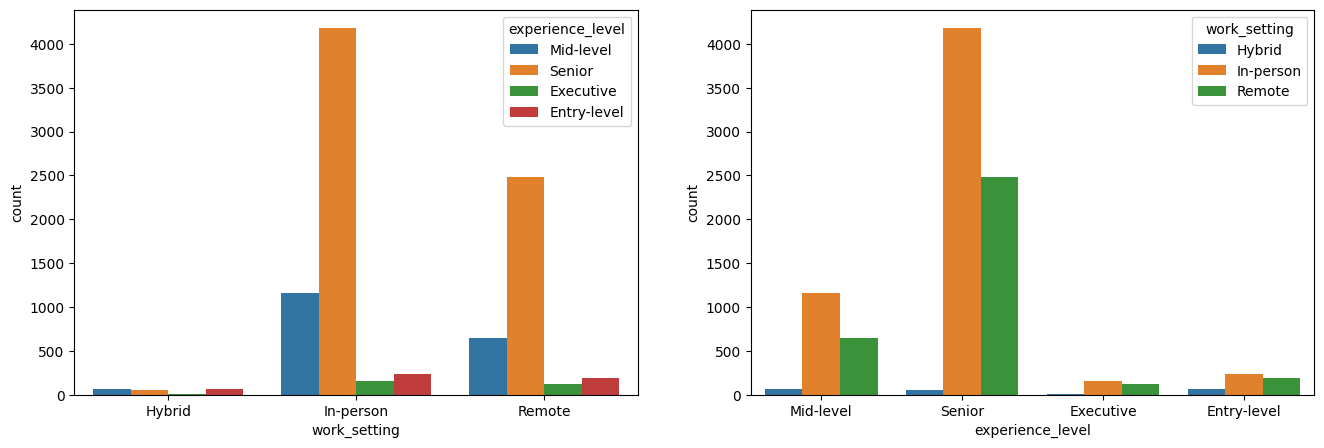

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="work_setting",hue="experience_level", data=df)

plt.subplot(1, 2, 2)
sns.countplot(x="experience_level", hue="work_setting", data=df)

plt.show()


**Experience level and work setting wise salay trend**

<ipython-input-11-1e286ca02895>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



<Axes: xlabel='work_setting', ylabel='salary_in_usd'>

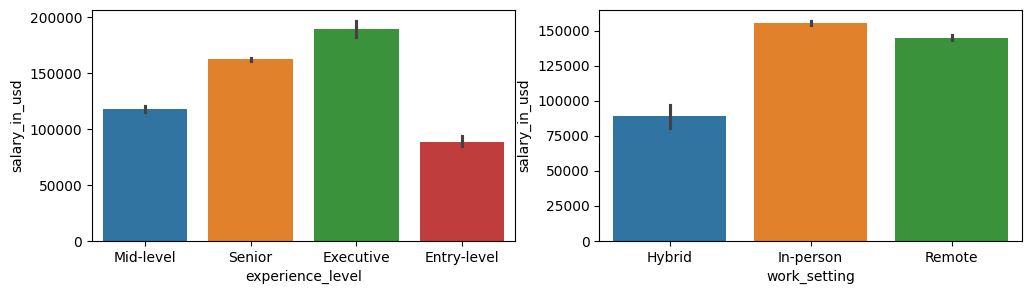

In [ ]:
plt.subplots(figsize=(12,3))
plt.subplot(1,2,1)
sns.barplot(x="experience_level",y="salary_in_usd",data=df,hue="experience_level")
plt.subplot(1,2,2)
sns.barplot(x="work_setting",y="salary_in_usd",data=df,hue="work_setting")

**Compant size wise salay**

Text(0.5, 1.0, 'Compant size wise salary')

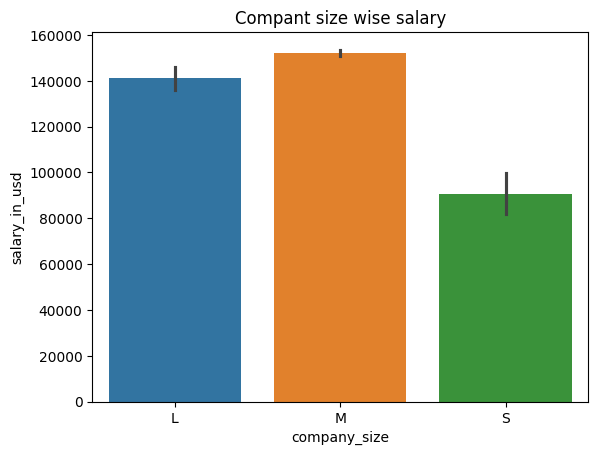

In [ ]:
sns.barplot(x="company_size",y="salary_in_usd",data=df,hue="company_size")
plt.title("Compant size wise salary")

**Employment type wise salary**

Text(0.5, 1.0, 'Employment type wise salary')

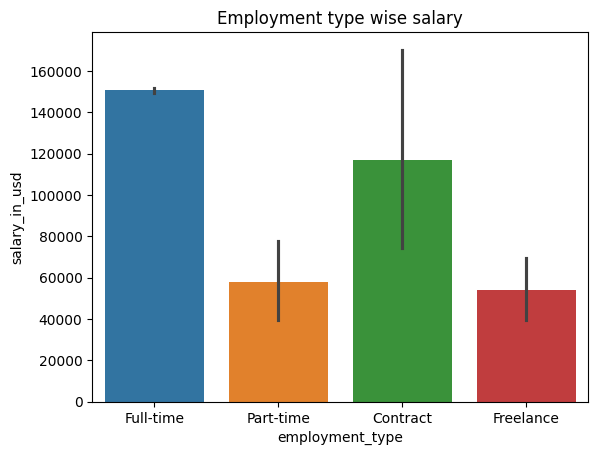

In [ ]:
sns.barplot(x="employment_type",y="salary_in_usd",data=df,hue="employment_type")
plt.title("Employment type wise salary")

**Top 5 country which provide highest salary**

In [ ]:
Top5_country = df.groupby("company_location").max()["salary_in_usd"].sort_values(ascending=False).head(5)
print(Top5_country)

company_location
United States     450000
United Kingdom    430967
Canada            306400
Qatar             300000
Australia         300000
Name: salary_in_usd, dtype: int64


**job Category wise average salary**

<ipython-input-14-78fb5d56c550>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




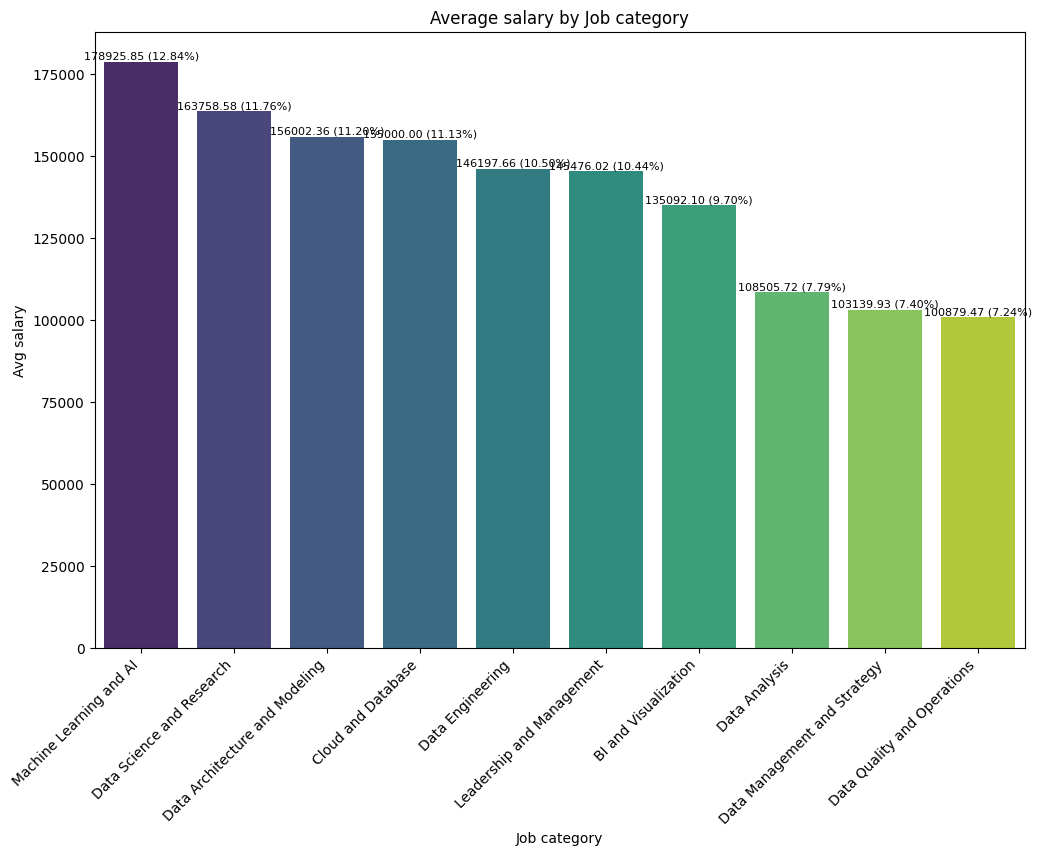

In [ ]:
#Job Category wise average salary
average_salary_by_jobcategory = df.groupby("job_category")["salary_in_usd"].mean().sort_values(ascending=False)

# Plot the avg. salary for each job category
plt.figure(figsize=(12, 8))
sns.barplot(x=average_salary_by_jobcategory.index, y=average_salary_by_jobcategory, palette='viridis')

plt.title("Average salary by Job category")
plt.xlabel("Job category")
plt.ylabel("Avg salary")

# Add percentage labels
total = sum(average_salary_by_jobcategory)
for i, v in enumerate(average_salary_by_jobcategory):
    percentage = (v / total) * 100
    plt.text(i, v + 50, f"{v:.2f} ({percentage:.2f}%)", ha="center", va="bottom", fontsize=8)

plt.xticks(rotation=45, ha="right")
plt.show()

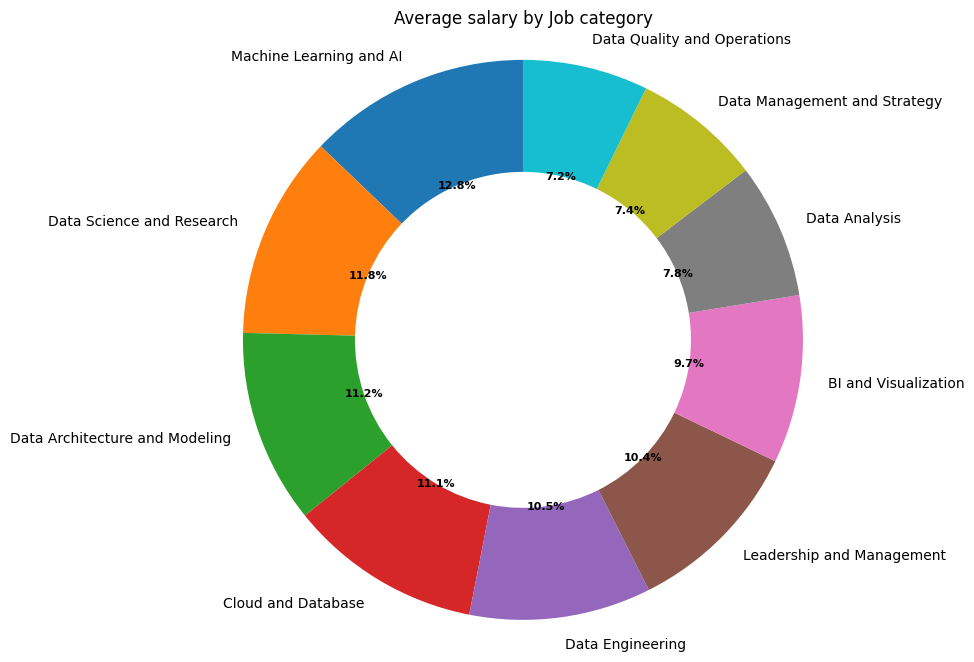

In [ ]:
import matplotlib.pyplot as plt

# Job Category wise average salary
average_salary_by_jobcategory = df.groupby("job_category")["salary_in_usd"].mean().sort_values(ascending=False)

# Plot the avg. salary for each job category as a donut pie chart
plt.figure(figsize=(10, 8))
plt.title("Average salary by Job category")

# Create the donut pie chart
wedges, texts, autotexts = plt.pie(average_salary_by_jobcategory, labels=average_salary_by_jobcategory.index,
                                   autopct=lambda p: '{:.1f}%'.format(p), startangle=90, wedgeprops=dict(width=0.4))

# Customize the appearance
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Country wise Job percentage**

In [ ]:
Top5_country = df.groupby("company_location").count()["job_title"].reset_index().sort_values(by="job_title",ascending=False).head(5)
Top5_country["Percentage"] = round(Top5_country["job_title"]*100/Top5_country["job_title"].sum(),1).astype("str")+"%"
Top5_country

,company_location,job_title,Percentage
69,United States,8132,90.4%
68,United Kingdom,449,5.0%
11,Canada,226,2.5%
61,Spain,113,1.3%
23,Germany,72,0.8%


**Year wise Job trend**

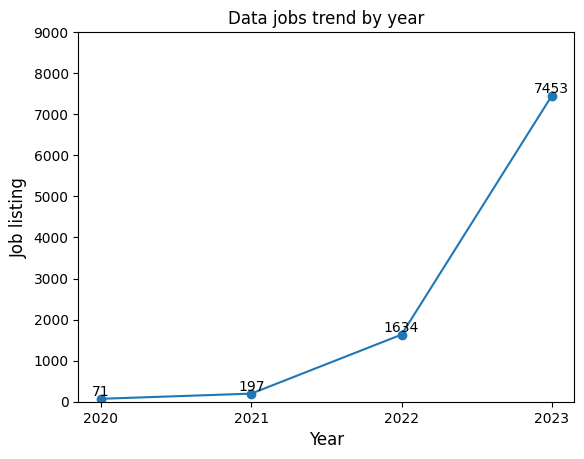

In [ ]:
jobs_by_year = df.groupby("work_year").count()["job_title"].to_frame().reset_index()

x = jobs_by_year["work_year"].astype("str")
y = jobs_by_year["job_title"]
plt.plot(x,y, marker="o")

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha="center",va="bottom")

plt.title("Data jobs trend by year")
plt.xlabel("Year",fontsize=12)
plt.ylabel("Job listing", fontsize=12)
plt.ylim(bottom=0,top=9000)
plt.show()

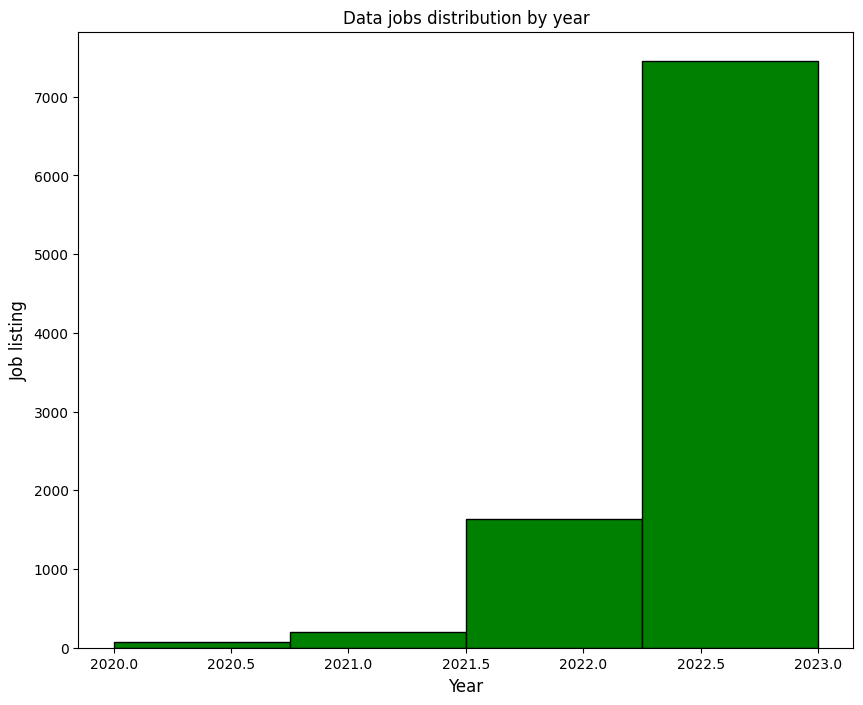

In [ ]:
#histogram plot
plt.figure(figsize=(10, 8))
plt.hist(df['work_year'], bins=len(df['work_year'].unique()), color='green', edgecolor='black')
plt.title("Data jobs distribution by year")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Job listing", fontsize=12)
plt.show()


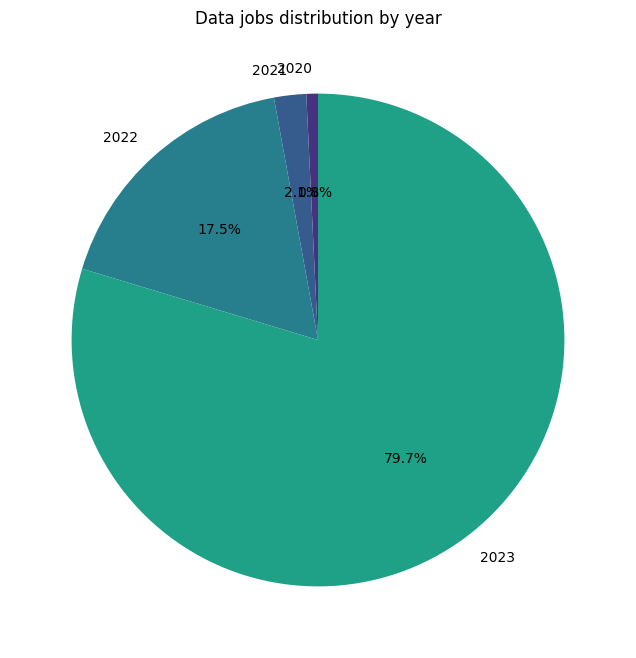

In [ ]:
#piechart
plt.figure(figsize=(10, 8))
plt.pie(jobs_by_year['job_title'], labels=jobs_by_year['work_year'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title("Data jobs distribution by year")
plt.show()
